In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    accuracy_score,
    jaccard_score,
    matthews_corrcoef,
    f1_score,
)

In [39]:
def load_data(path):
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    files = sorted([x for x in files if 'labels' in x])
    data = []
    for cloud_file in files:
        with open(path+cloud_file) as fp:
            data += [int(line.split()[0]) for line in fp]
    print(len(data), 'points loaded.')
    return np.array(data, dtype=int)

def print_metrics(actuals, predictions):
    balanced_accuracy = balanced_accuracy_score(actuals, predictions)
    accuracy = accuracy_score(actuals, predictions)
    jaccard = jaccard_score(actuals, predictions, average='micro')
    matthews = matthews_corrcoef(actuals, predictions)
    f1 = f1_score(actuals, predictions, average='micro')
    print(f'Balanced accuracy: {balanced_accuracy:.4f}, Accuracy: {accuracy:.4f}, IOU: {jaccard:.4f}, Matthews: {matthews:.4f}, F1: {f1:.4f}')

def plot_confusion_matrix(norm_cm, cm, target_names):
    plt.figure(figsize=(17, 8))
    plt.imshow(norm_cm, interpolation='nearest', cmap=plt.get_cmap('Greys'))
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=0)
    plt.yticks(tick_marks, target_names)

    thresh = norm_cm.max() / 2
    for i, j in itertools.product(range(norm_cm.shape[0]), range(norm_cm.shape[1])):
        plt.text(j, i, "{:0.2f}% ({})".format(norm_cm[i, j]*100, cm[i, j]),
                     horizontalalignment="center",
                     color="white" if norm_cm[i, j] > thresh else "black", fontsize=15)

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [40]:
ground_truth_path = './data_original/ground_truth/'
actuals = load_data(ground_truth_path)
predictions_path = './data_original/results/'
predictions = load_data(predictions_path)

4480 points loaded.
4480 points loaded.


Balanced accuracy: 0.7409, Accuracy: 0.7433, IOU: 0.5915, Matthews: 0.6783, F1: 0.7433


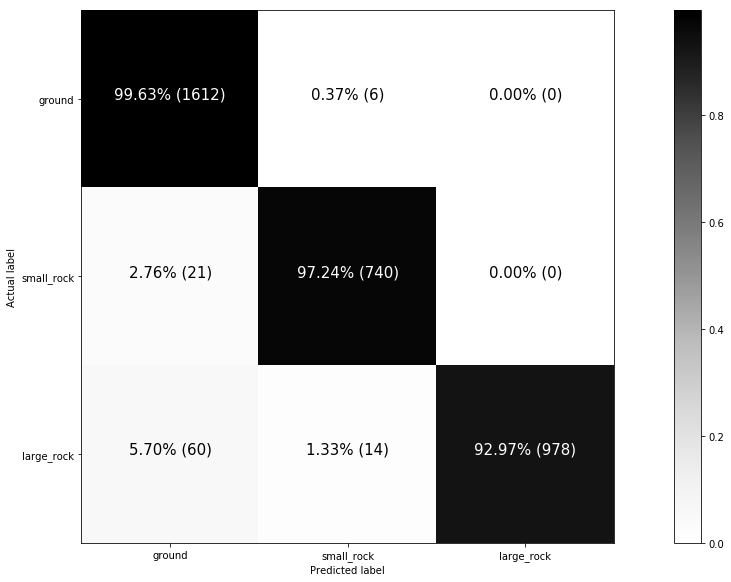

In [41]:
norm_cm = confusion_matrix(actuals, predictions, labels=list(range(1, 4)), normalize='true')
cm = confusion_matrix(actuals, predictions, labels=list(range(1, 4)))

print_metrics(actuals, predictions)
plot_confusion_matrix(norm_cm, cm, ['ground', 'small_rock', 'large_rock'])

In [43]:
np.sum(predictions==1)/len(predictions), np.sum(predictions==2)/len(predictions), np.sum(predictions==3)/len(predictions)

(0.37790178571428573, 0.16964285714285715, 0.21830357142857143)

In [49]:
np.sum(actuals==1)/len(actuals), np.sum(actuals==2)/len(actuals), np.sum(actuals==3)/len(actuals)

(0.4772321428571429, 0.22321428571428573, 0.2995535714285714)

In [51]:
indices = np.logical_and(predictions!=1, np.logical_and(predictions!=2, predictions!=3))
len(predictions[indices]), list(predictions[indices])

(1049,
 [-1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -1803023647,
  -

In [81]:
d = np.load('./data_original/processed/test/pointcloud/M2v19_voxels.npy')
np.sum(d[:, -1] == 0)/len(d)

1.0

In [71]:
d = np.load('./data_original/processed/train/pointcloud/M1v17_voxels.npy')
np.sum(d[:, -1] == 0)

0